In [1]:
from ipynb.fs.full.util import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
plt = basic_plot_structure(plt)

In [3]:
np.random.seed(42) 

In [4]:
from pathlib import Path

# Where to save the figures
IMAGES_PATH = Path() / "images" / "chapert_1"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [5]:
data_root = "https://github.com/ageron/data/raw/main/"
dataset_life_satisfaction= pd.read_csv(data_root + "lifesat/lifesat.csv")

In [6]:
dataset_life_satisfaction.describe()

,GDP per capita (USD),Life satisfaction
count,27.000000,27.000000
mean,41564.521771,6.566667
std,9631.452319,0.765607
min,26456.387938,5.400000
25%,33938.289305,5.900000
50%,41627.129269,6.800000
75%,49690.580269,7.300000
max,60235.728492,7.600000


In [7]:
dataset_life_satisfaction.head(10)

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6
5,Portugal,32181.154537,5.4
6,Poland,32238.157259,6.1
7,Estonia,35638.421351,5.7
8,Spain,36215.447591,6.3
9,Slovenia,36547.738956,5.9


In [8]:
X = dataset_life_satisfaction["GDP per capita (USD)"].values
y = dataset_life_satisfaction["Life satisfaction"].values

X = X.reshape(-1, 1) # convert 1-D array to 2-D because Linerregression required 2-D array

In [9]:
X,y

(array([[26456.38793813],
        [27287.08340093],
        [28384.98778463],
        [29932.49391006],
        [31007.76840654],
        [32181.15453723],
        [32238.15725928],
        [35638.42135118],
        [36215.44759073],
        [36547.73895598],
        [36732.03474403],
        [38341.30757041],
        [38992.14838075],
        [41627.12926943],
        [42025.61737306],
        [42404.39373816],
        [45856.62562648],
        [47260.80045844],
        [48210.03311134],
        [48697.83702825],
        [50683.32350972],
        [50922.35802345],
        [51935.60386182],
        [52279.72885136],
        [54209.56383573],
        [55938.2128086 ],
        [60235.7284917 ]]),
 array([5.8, 5.4, 5.5, 5.9, 5.6, 5.4, 6.1, 5.7, 6.3, 5.9, 5.9, 7.2, 6. ,
        6.8, 6.5, 7.3, 7.4, 7.6, 6.9, 7.3, 7.3, 7. , 7.1, 7.5, 7.4, 7.6,
        6.9]))

(np.float64(23500.0), np.float64(62500.0), np.float64(4.0), np.float64(9.0))

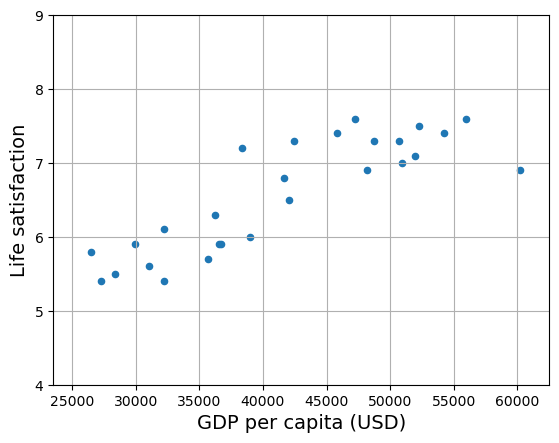

In [10]:
dataset_life_satisfaction.plot(kind="scatter", grid=True, x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])

In [11]:
# select a linear model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# train the model
model.fit(X, y)

LinearRegression()

In [12]:
# Make prediction for Cyprus
X_new = [[37_655.2]]
print(model.predict(X_new))

[6.30165767]


In [13]:
from sklearn.neighbors import KNeighborsRegressor

# train model with KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X, y)

print(model.predict(X_new))

[6.33333333]


In [14]:
import urllib.request

datapath = Path() / "datasets" / "lifesat"
datapath.mkdir(parents=True, exist_ok=True)

data_root = "https://github.com/ageron/data/raw/main/"
for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):
    if not (datapath / filename).is_file():
        print("Downloading", filename)
        url = data_root + "lifesat/" + filename
        urllib.request.urlretrieve(url, datapath / filename)

In [15]:
oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv")

In [16]:
gdp_per_capita.head()

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
0,Afghanistan,AFG,2002,1189.784668
1,Afghanistan,AFG,2003,1235.810063
2,Afghanistan,AFG,2004,1200.278013
3,Afghanistan,AFG,2005,1286.793659
4,Afghanistan,AFG,2006,1315.789117


In [17]:
gdp_per_capita

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
0,Afghanistan,AFG,2002,1189.784668
1,Afghanistan,AFG,2003,1235.810063
2,Afghanistan,AFG,2004,1200.278013
3,Afghanistan,AFG,2005,1286.793659
4,Afghanistan,AFG,2006,1315.789117
...,...,...,...,...
7104,Zimbabwe,ZWE,2016,3173.610829
7105,Zimbabwe,ZWE,2017,3274.611198
7106,Zimbabwe,ZWE,2018,3341.665418
7107,Zimbabwe,ZWE,2019,3027.656038


In [18]:
# Process only 2020 data only
gdp_year = 2020

gdppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"
gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"] == gdp_year]
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis=1)
gdp_per_capita.columns = ["Country", gdppc_col]
gdp_per_capita.set_index("Country", inplace=True)

gdp_per_capita.head()

,GDP per capita (USD)
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297


In [19]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


In [20]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


In [21]:
oecd_bli.columns

Index(['Air pollution', 'Dwellings without basic facilities',
       'Educational attainment', 'Employees working very long hours',
       'Employment rate', 'Feeling safe walking alone at night',
       'Homicide rate', 'Household net adjusted disposable income',
       'Household net wealth', 'Housing expenditure',
       'Labour market insecurity', 'Life expectancy', 'Life satisfaction',
       'Long-term unemployment rate', 'Personal earnings',
       'Quality of support network', 'Rooms per person',
       'Self-reported health',
       'Stakeholder engagement for developing regulations', 'Student skills',
       'Time devoted to leisure and personal care', 'Voter turnout',
       'Water quality', 'Years in education'],
      dtype='object', name='Indicator')

In [22]:
#Merge GDP_PER_CAPITA and OECD
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by=gdppc_col, inplace=True)
full_country_stats = full_country_stats[[gdppc_col, lifesat_col]]

full_country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5


In [24]:
min_gdp = 23_500
max_gdp = 62_500
country_stats = full_country_stats[(full_country_stats[gdppc_col] >= min_gdp) & (full_country_stats[gdppc_col] <= max_gdp)]

country_stats.head(10)

,GDP per capita (USD),Life satisfaction
Country,,
Russia,26456.387938,5.8
Greece,27287.083401,5.4
Turkey,28384.987785,5.5
Latvia,29932.493910,5.9
Hungary,31007.768407,5.6
Portugal,32181.154537,5.4
Poland,32238.157259,6.1
Estonia,35638.421351,5.7
Spain,36215.447591,6.3


In [25]:
country_stats.to_csv(datapath / "lifesat.csv")
full_country_stats.to_csv(datapath / "lifesat_full.csv")

(np.float64(23500.0), np.float64(62500.0), np.float64(4.0), np.float64(9.0))

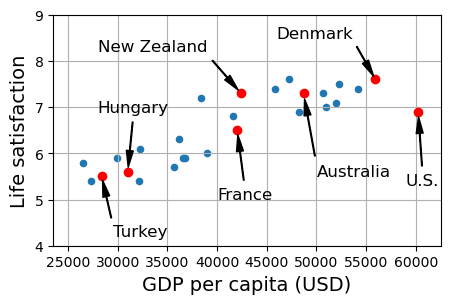

In [31]:
country_stats.plot(kind='scatter', figsize=(5,3), grid=True, x=gdppc_col, y=lifesat_col)
min_life_sat=4
max_life_sat=9

position_text = {
    "Turkey": (29_500, 4.2),
    "Hungary": (28_000, 6.9),
    "France": (40_000, 5),
    "New Zealand": (28_000, 8.2),
    "Australia": (50_000, 5.5),
    "United States": (59_000, 5.3),
    "Denmark": (46_000, 8.5)
}

for country, pos_text in position_text.items():
    pos_data_x = country_stats[gdppc_col].loc[country]
    pos_data_y = country_stats[lifesat_col].loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

In [32]:
highlighted_countries = country_stats.loc[list(position_text.keys())]
highlighted_countries[[gdppc_col, lifesat_col]].sort_values(by=gdppc_col)

,GDP per capita (USD),Life satisfaction
Country,,
Turkey,28384.987785,5.5
Hungary,31007.768407,5.6
France,42025.617373,6.5
New Zealand,42404.393738,7.3
Australia,48697.837028,7.3
Denmark,55938.212809,7.6
United States,60235.728492,6.9


In [33]:
X_sample = country_stats[[gdppc_col]].values
y_sample = country_stats[[lifesat_col]].values

lin_reg = LinearRegression()
lin_reg.fit(X_sample, y_sample)

t0, t1 = lin_reg.intercept_[0], lin_reg.coef_.ravel()[0]
print(f"θ0={t0:.2f}, θ1={t1:.2e}")

θ0=3.75, θ1=6.78e-05


(np.float64(23500.0), np.float64(62500.0), np.float64(4.0), np.float64(9.0))

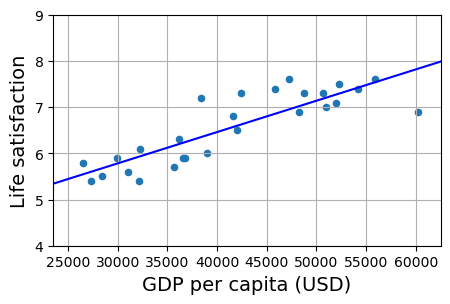

In [37]:
country_stats.plot(kind='scatter', figsize=(5,3), grid=True, x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0+t1*X, "b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

In [38]:
cyprus_gdp_per_capita = gdp_per_capita[gdppc_col].loc["Cyprus"]
cyprus_gdp_per_capita

np.float64(37655.1803457421)

In [40]:
cyprus_predicted_life_satisfaction = lin_reg.predict([[cyprus_gdp_per_capita]])[0, 0]
cyprus_predicted_life_satisfaction

np.float64(6.301656332738055)

(np.float64(23500.0), np.float64(62500.0), np.float64(4.0), np.float64(9.0))

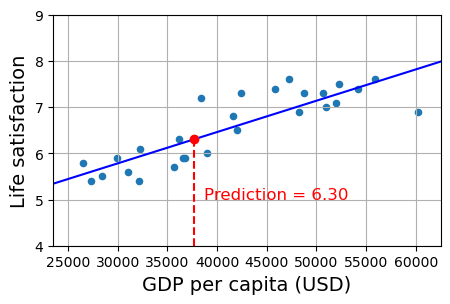

In [45]:
country_stats.plot(kind='scatter', x=gdppc_col, y=lifesat_col, grid=True, figsize=(5,3))

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0+t1*X, "b")

plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [min_life_sat, cyprus_predicted_life_satisfaction], "r--")
plt.text(cyprus_gdp_per_capita + 1000, 5.0,
         fr"Prediction = {cyprus_predicted_life_satisfaction:.2f}", color="r")

plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

In [46]:
missing_data = full_country_stats[(full_country_stats[gdppc_col] < min_gdp) |
                                  (full_country_stats[gdppc_col] > max_gdp)]
missing_data

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5
Norway,63585.903514,7.6
Switzerland,68393.306004,7.5
Ireland,89688.956958,7.0
Luxembourg,110261.157353,6.9


In [47]:
position_text_missing_countries = {
    "South Africa": (20_000, 4.2),
    "Colombia": (6_000, 8.2),
    "Brazil": (18_000, 7.8),
    "Mexico": (24_000, 7.4),
    "Chile": (30_000, 7.0),
    "Norway": (51_000, 6.2),
    "Switzerland": (62_000, 5.7),
    "Ireland": (81_000, 5.2),
    "Luxembourg": (92_000, 4.7),
}

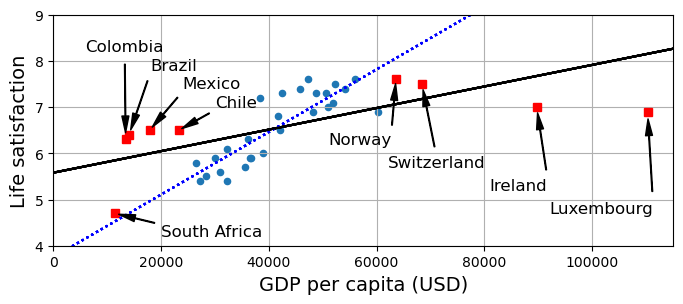

In [54]:
full_country_stats.plot(kind="scatter", grid=True, figsize=(8,3), x=gdppc_col, y=lifesat_col)

for country, pos_text in position_text_missing_countries.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text, fontsize=12, arrowprops=dict(facecolor="black", width=0.5, shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")
    X=np.linspace(0, 115_000, 1000)
    plt.plot(X, t0+t1*X, "b:")

    lin_reg_full = LinearRegression()
    Xfull = np.c_[full_country_stats[gdppc_col]]
    yfull = np.c_[full_country_stats[lifesat_col]]
    lin_reg_full.fit(Xfull, yfull)

    t0_full, t1_full = lin_reg_full.intercept_[0], lin_reg_full.coef_.ravel()[0]

    X = np.linspace(0, 115_000, 1000)
    plt.plot(X, t0_full + t1_full * X, "k")

    plt.axis([0, 115_000, min_life_sat, max_life_sat])
    

(np.float64(0.0), np.float64(115000.0), np.float64(4.0), np.float64(9.0))

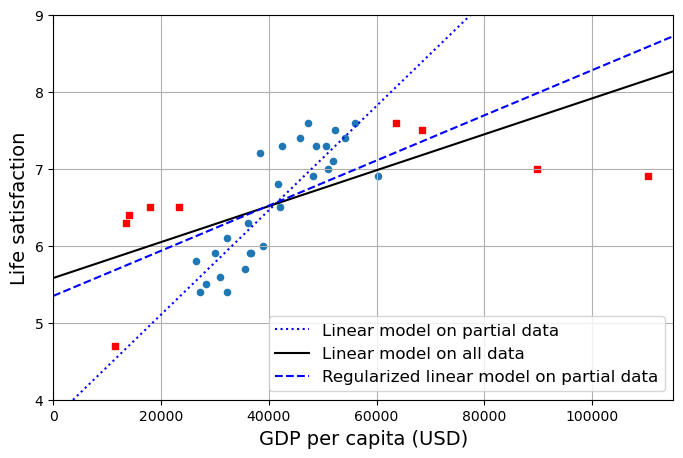

In [57]:
from sklearn import linear_model

country_stats.plot(kind='scatter', x=gdppc_col, y=lifesat_col, figsize=(8, 5))
missing_data.plot(kind='scatter', x=gdppc_col, y=lifesat_col,
                  marker="s", color="r", grid=True, ax=plt.gca())

X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")
plt.plot(X, t0_full + t1_full * X, "k-", label="Linear model on all data")

ridge = linear_model.Ridge(alpha=10**9.5)
X_sample = country_stats[[gdppc_col]]
y_sample = country_stats[[lifesat_col]]
ridge.fit(X_sample, y_sample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_.ravel()[0]
plt.plot(X, t0ridge + t1ridge * X, "b--",
         label="Regularized linear model on partial data")
plt.legend(loc="lower right")

plt.axis([0, 115_000, min_life_sat, max_life_sat])